<a href="https://colab.research.google.com/github/akashsinghsharma/Time-Series/blob/main/Time_Series_Analysis_and_Forecasting_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 2: Time Series

In [ ]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np

In [ ]:
import numpy as np
import pandas as pd

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-) #The pandas data reader is creating error is I am using this from stackoverflow.
from pandas_datareader import data as pdr

df = pdr.get_data_yahoo('TSLA', start='2010-06-1')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200
2023-07-27,268.309998,269.130005,255.300003,255.710007,255.710007,103697300
2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111149300


SMA: A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range. A window is needed to defined, say window is 10 meaning average of 10 time interval will be taken and entered in 11th row, next 10 rows average are taken and entered in 12th row and same goes on.

<Axes: xlabel='Date'>

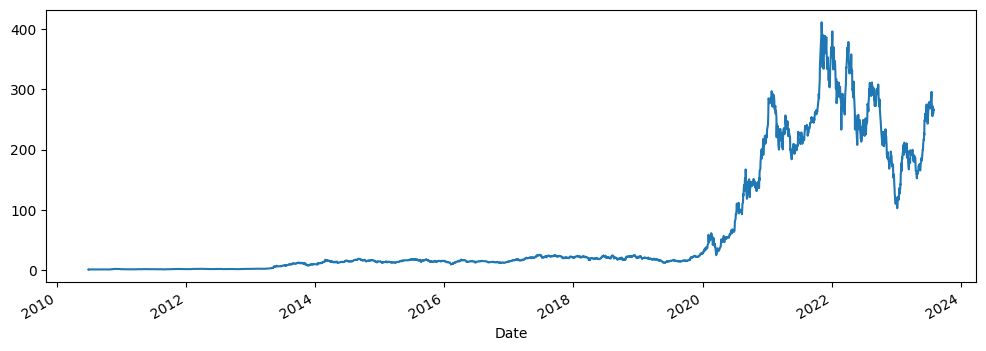

In [ ]:
df['Open'].plot(figsize = (12,4))

<Axes: xlabel='Date'>

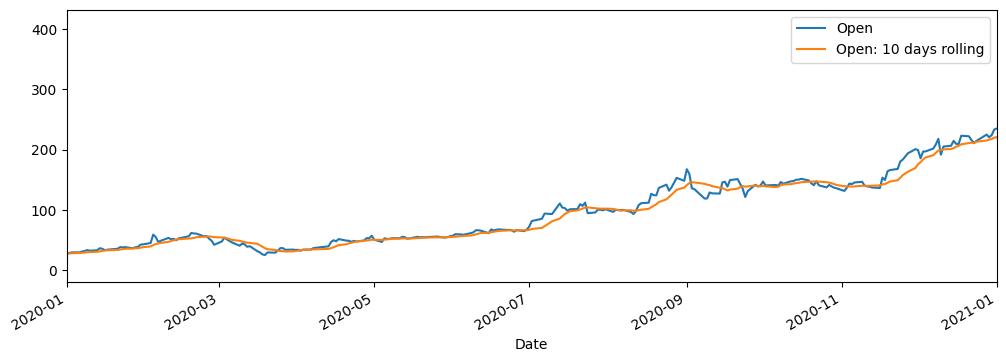

In [ ]:
df['Open: 10 days rolling']= df['Open'].rolling(10, min_periods = 1).mean() #rolling function is used to calculate Simple moving average. #windows will define how many row's SMA it will count and min-period will define how many rows will be kept with NAN, other will have same value till windows.
df[['Open', 'Open: 10 days rolling']].plot(xlim = ['2020-01-01', '2021,01,01'], figsize =(12,4))

In stock market, when stock price line is below moving average is usually a buy time, and above is a sell time( in short term ).

In data analysis we create many windows and then see how it works and which is best.

In [ ]:
df['Open: 30 days rolling']= df['Open'].rolling(30, min_periods = 1).mean()
df['Open: 50 days rolling']= df['Open'].rolling(50, min_periods = 1).mean()

<Axes: xlabel='Date'>

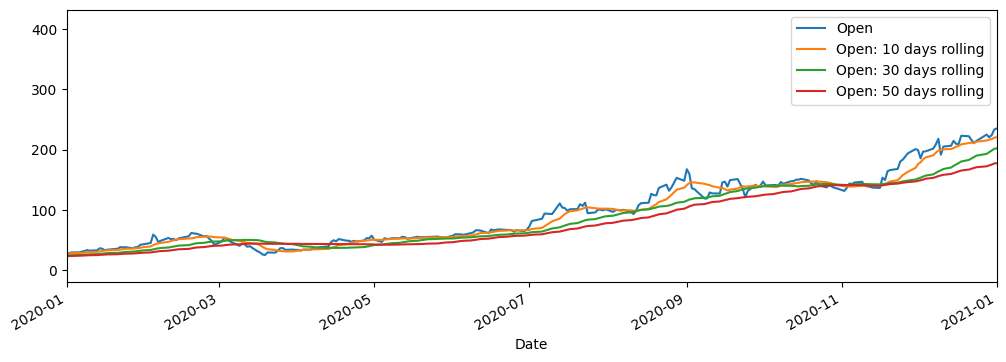

In [ ]:
df[['Open', 'Open: 10 days rolling','Open: 30 days rolling', 'Open: 50 days rolling' ]].plot(xlim = ['2020-01-01', '2021,01,01'], figsize =(12,4))

Disadvantage:

1. It gives similar importance to all the data. (Ideally more weight should be given to recent data)

**Cummulative Moving Average** | CMA

Here we calculate average(mean) of two rows, then of 3, then of 4, and so on.

<Axes: xlabel='Date'>

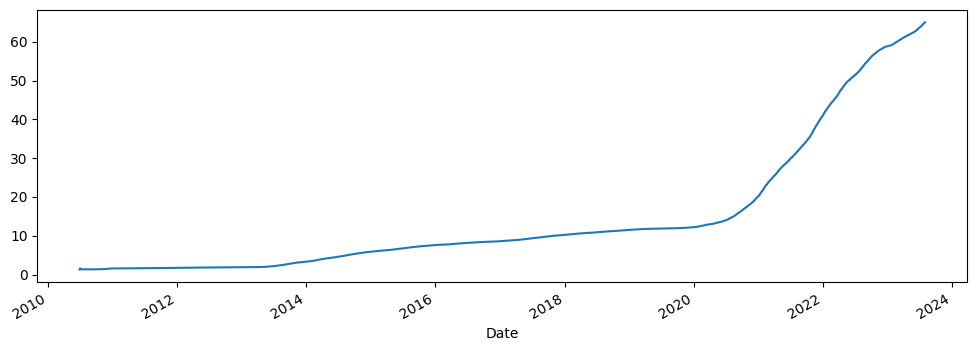

In [ ]:
#Expanding | # CMA

df['Open'].expanding().mean().plot(figsize = (12,4))

**Exponential moving average**| EMA

`((close - Prev EMA) * multiplier ) + Prev EMA` <-- Formulae

Here also there is going to be some rolling window,like say 10 which will be null in final result.
To calculate this (in excel):
Assume the rolling window here is 10.
1. Calulate the simple moving average and write in pon 10th row. Treat it as prev EMA as otherwise 10 cell will remain empty in rolling window of 10.
2. Now apply the formulae. Instead of 'close' use whatever feature you are calulating.
3. After finding ema for 11th row, start using last ema, the formulae will reeeeeeesame on excel.

`multipler = 2 / (rolling window size +1 )` <-- formulae.



---

**Exponential weighted moving average**| EWMA

`weight * x(t) + (1-weight) EMWA(t-1)` <-- Formulae

Weight is there to prevent any kind of lags.


In [ ]:
df['EMA_0.1']= df['Open'].ewm(alpha = 0.1 , adjust = False ).mean() #alpha = Hyperparameter

<Axes: xlabel='Date'>

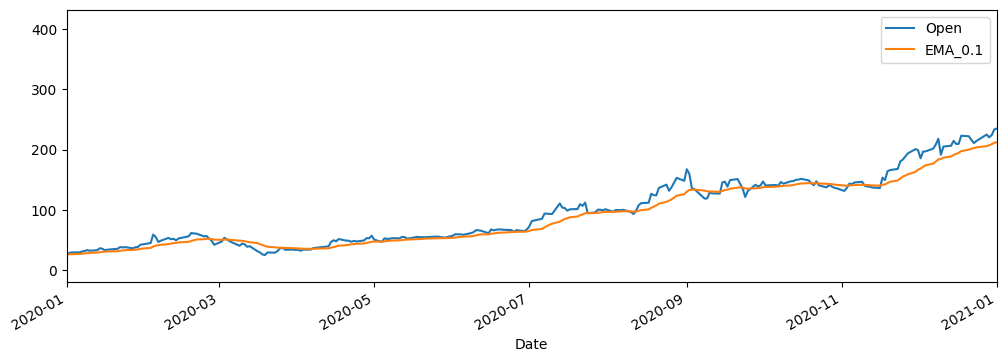

In [ ]:
df[['Open', 'EMA_0.1']].plot(xlim = ['2020-01-01', '2021,01,01'], figsize =(12,4))

This is better than SMA.
Play with different parameter for different smothing curve by EMA.

<Axes: xlabel='Date'>

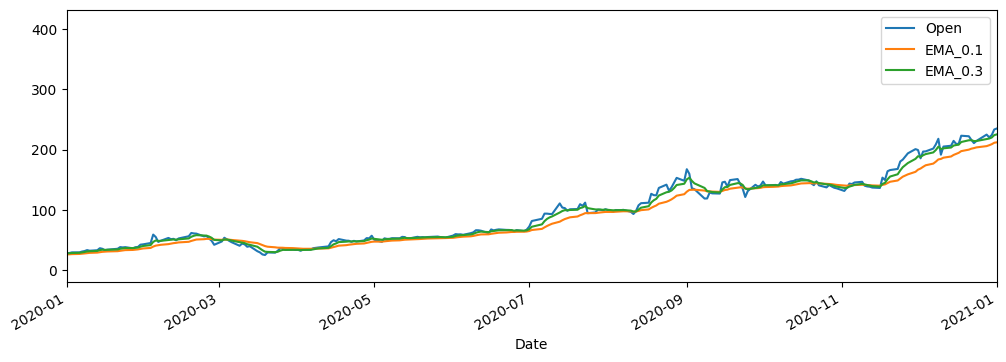

In [ ]:
df['EMA_0.3']= df['Open'].ewm(alpha = 0.3 , adjust = False ).mean() #alpha = Hyperparameter called smoothining factor.
df[['Open', 'EMA_0.1', 'EMA_0.3']].plot(xlim = ['2020-01-01', '2021,01,01'], figsize =(12,4))

EWMA

In [ ]:
df['EWMA_5days']= df['Open'].ewm(span = 5).mean()

<Axes: xlabel='Date'>

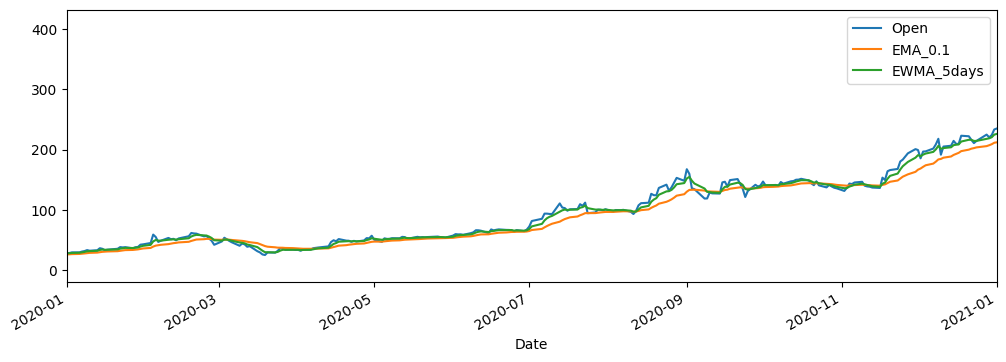

In [ ]:
df[['Open', 'EMA_0.1' ,'EWMA_5days']].plot(xlim = ['2020-01-01', '2021,01,01'], figsize = (12,4))

**ARIMA**: AR + I + MA

AR- AUTOREGRESSION
MA-MOVING AVERAGE

AR+MA : **ARMA**- Used in forecasting, sales, monthly production, etc. Not really helpful in stocks.

Q: Does we use pacf plot or acf plot in moving average, etc. Mnay such que can be asked in interview.

**Moving average models:**



# Day 3: ARIMA, SARIMAX, FBPROPHET

1. Autoregression: Done with PACF
2. Moving average: Done with ACF(auto corelation) plot.
3. Integrated: ifferecing.D


In [ ]:
air_df = pd.read_csv('/content/drive/MyDrive/Random data/AirPassengers.csv')
air_df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Regression algorithm:
Suppose we are forecasting and analysing sales of onion. Say We are in month of april. April is t.

JAN | t-3

FEB | t-2

MAR | t-1

APR | t (let this be t) (sales prediction)


k = 4, here. K is called lag. We will refer 4 last month to find sale of 5th month.

`SALES(at t) = B0 + B1 * SALES(at t-1) + B2 * SALES (at t-1) + ....` <-- Formulae

> We will try to build a regression like algorithm with lag of sales to find sale of t-th month (or any time interval).

> We need to define if k = 1, 2, 3, 4, etc. To define it we plot **PACF** (partial corelation).

> It will help us to see how much one month's sale is impacting the sales(of month we are forecasting).

> The plot will be lag (time stamp) vs time (the time we are forecasting sales for). So it specific lag vs current time stamp.

> There is a upper bong and lower bond on both side. If the plot graph croses it, it(that time stamp) will have high impace. If it's below that line it have low impact.

> We can simply count those lags of time stamps and set the value of K and experiment it in arima model.

> We provide p, d, q value here. ##

SARIMAX

There are going to be cases where the chart of PACF will be lower than bound for some time stamps and then it will cross the bound. Such things happens during seasonal trends. In those cases we apply SARIMAX algorithm here.

> We supply p, d, q and along with season value (done in practical).

ARIMA or SARIMAX problem statement:

1. Check the data for stationery.
> Dickey furer test: H0 - Unit root = 1 => Data is not statinoery & H1 - Unit root < 1 => Data is stationery.
=> A seasonal data with increasing trend is not stationery data.
Condition for stationery data:

a. Mean should be constant.

b. STD should also be constant.

c. Dickey fuler test: gives p values. if p < .05 then null hypo gets rejected. If p>= .05 the null is accepted.
(Maths explained at 23:00)

For ARIMA : we find p, q, r for ar , i, ma.

In [ ]:
air_df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [ ]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
